# Results

In [2]:
# load the answers from the json file
from caia.utils import load_from_json

llm_name = "llama3-8b-8192"
# llm_name = "llama3-70b-8192"


dataset_folder = "datasets/healthcare"


answers_cama_agent = load_from_json(f'{dataset_folder}/answers_cama_agent_{llm_name}.json')
answers_full_prompt = load_from_json(f'{dataset_folder}/answers_full_prompt_{llm_name}.json')
answers_full_prompt_cot = load_from_json(f'{dataset_folder}/answers_full_prompt_cot_{llm_name}.json')
answers_reflection = load_from_json(f'{dataset_folder}/answers_reflection_report_{llm_name}.json')
answers_react = load_from_json(f'{dataset_folder}/answers_react_report_{llm_name}.json')
answers_self_discover = load_from_json(f'{dataset_folder}/answers_self_discover_report_{llm_name}.json')
answers_plan_and_execute = load_from_json(f'{dataset_folder}/answers_plan_and_execute_report_{llm_name}.json')



# answers_reflection

datasets/healthcare/answers_cama_agent_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_full_prompt_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_full_prompt_cot_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_reflection_report_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_react_report_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_self_discover_report_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_plan_and_execute_report_llama3-8b-8192.json object loaded successfully

# Plot 

datasets/healthcare/qa_list.json object loaded successfully

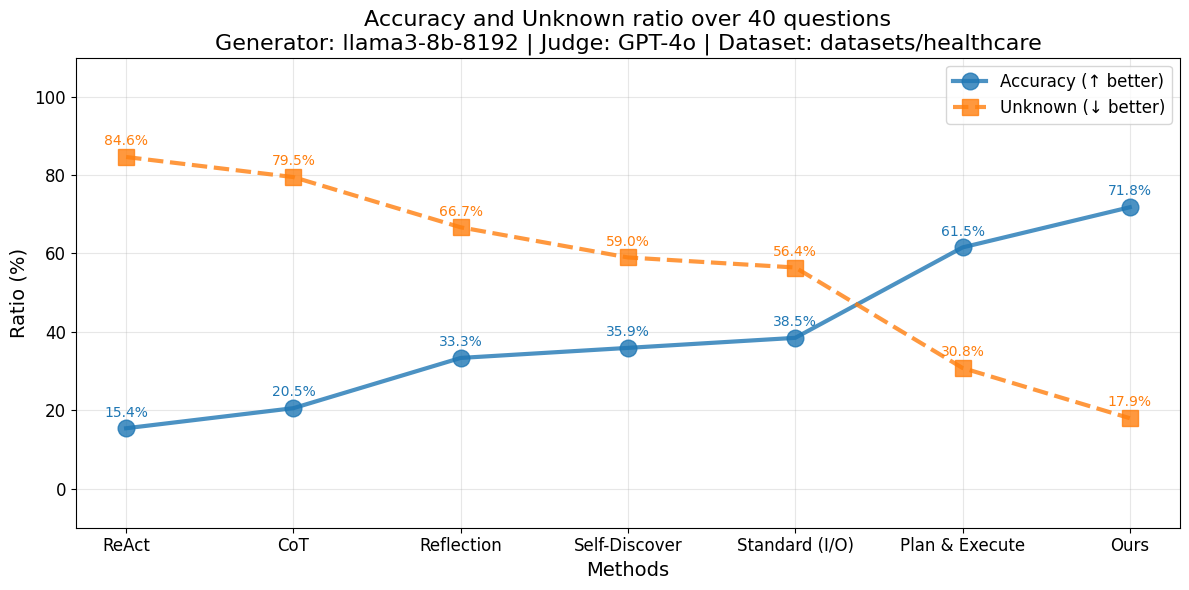

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, Tuple
from cama.utils import evaluate_answers_with_unknowns

# load qa list
qa_list = load_from_json(f'{dataset_folder}/qa_list.json')

def plot_scores_with_unknowns(scores: Dict[str, Tuple[float, float]], llm_name: str):
    """
    Creates a single line plot showing both accuracy scores and unknown ratios.

    Parameters:
    scores (Dict[str, Tuple[float, float]]): A dictionary where keys are method names and values are tuples (accuracy, unknown_ratio).
    llm_name (str): The name of the language model used as the report generator.
    """
    methods = list(scores.keys())
    accuracies = [score[0] for score in scores.values()]
    unknown_ratios = [score[1] for score in scores.values()]

    # Sort methods by accuracy for better visual trend
    sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k])
    methods = [methods[i] for i in sorted_indices]
    accuracies = [accuracies[i] for i in sorted_indices]
    unknown_ratios = [unknown_ratios[i] for i in sorted_indices]

    plt.figure(figsize=(12, 6))

    # Plot both lines on the same graph
    plt.plot(methods, accuracies, marker='o', linewidth=3, color='#1f77b4', markersize=12, label='Accuracy (↑ better)', alpha=0.8)
    plt.plot(methods, unknown_ratios, marker='s', linewidth=3, color='#ff7f0e', markersize=12, label='Unknown (↓ better)', alpha=0.8, linestyle='--')
    
    # Highlight CAMA with different markers
    # cama_index = methods.index("CAMA") if "CAMA" in methods else -1
    # if cama_index != -1:
    #     plt.plot(cama_index, accuracies[cama_index], marker='*', markersize=20, color='#1f77b4', label='CAMA (Acc)', linewidth=0)
    #     plt.plot(cama_index, unknown_ratios[cama_index], marker='P', markersize=20, color='#ff7f0e', label='CAMA (Unk)', linewidth=0)
    
    plt.ylim(-10, 110)
    plt.xlabel('Methods', fontsize=14)
    plt.ylabel('Ratio (%)', fontsize=14)
    plt.title(f'Accuracy and Unknown ratio over 40 questions\nGenerator: {llm_name} | Judge: GPT-4o | Dataset: {dataset_folder}', fontsize=16)
    plt.grid(alpha=0.3)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)

    # # Create a custom legend order
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [0, 1]  # Accuracy, Unknown
    # if cama_index != -1:
    #     order.extend([2, 3])  # CAMA (Acc), CAMA (Unk)
    plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], fontsize=12)

    # Add value labels on each point with offset for better readability
    for i, (acc, unk) in enumerate(zip(accuracies, unknown_ratios)):
        # if acc > unk:
        plt.text(i, acc + 3, f'{acc:.1f}%', ha='center', fontsize=10, color='#1f77b4')
        plt.text(i, unk + 3, f'{unk:.1f}%', ha='center', fontsize=10, color='#ff7f0e')
        # else:
        #     plt.text(i, acc - 2, f'{acc:.1f}%', ha='center', fontsize=10, color='#1f77b4')
        #     plt.text(i, unk + 2, f'{unk:.1f}%', ha='center', fontsize=10, color='#ff7f0e')

    # save plot in pdf
    # plt.savefig(f'{dataset_folder}/scores_plot_{llm_name}.pdf', bbox_inches='tight')
    plt.tight_layout()
    plt.show()

# Example usage:
scores = {
    "Standard (I/O)": evaluate_answers_with_unknowns(qa_list, answers_full_prompt),
    "CoT": evaluate_answers_with_unknowns(qa_list, answers_full_prompt_cot),
    "Ours": evaluate_answers_with_unknowns(qa_list, answers_cama_agent),
    "Reflection": evaluate_answers_with_unknowns(qa_list, answers_reflection),
    "ReAct": evaluate_answers_with_unknowns(qa_list, answers_react),
    "Self-Discover": evaluate_answers_with_unknowns(qa_list, answers_self_discover),
    "Plan & Execute": evaluate_answers_with_unknowns(qa_list, answers_plan_and_execute),
}

plot_scores_with_unknowns(scores, llm_name)

# Latex table

In [12]:
from cama.utils import load_from_json, evaluate_answers_with_unknowns

# Function to calculate and print the results
def calculate_and_print_results():
    llm_names = ["llama3-8b-8192", "llama3-70b-8192"]
    dataset_folders = ["datasets/healthcare", "datasets/eligibility", "datasets/financial"]

    methods = [
        "full_prompt", "full_prompt_cot", "reflection_report",
        "react_report", "self_discover_report", "plan_and_execute_report", "cama_agent"
    ]
    
    method_names = [
        "Standard (I/O)", "CoT", "Reflection", "ReAct",
        "Self-Discover", "Plan and Execute", "Ours"
    ]

    results = {(method, llm, dataset): {"accuracy": 0, "unknown": 0} for method in method_names for llm in llm_names for dataset in dataset_folders}
    
    for llm_name in llm_names:
        for dataset_folder in dataset_folders:
            qa_list = load_from_json(f'{dataset_folder}/qa_list.json')

            for method, method_name in zip(methods, method_names):
                answers = load_from_json(f'{dataset_folder}/answers_{method}_{llm_name}.json')
                accuracy, unknown = evaluate_answers_with_unknowns(qa_list, answers)
                results[(method_name, llm_name, dataset_folder)]["accuracy"] = accuracy
                results[(method_name, llm_name, dataset_folder)]["unknown"] = unknown

    # Print LaTeX table
    print(r'\begin{table*}[ht]')
    print(r'    \centering')
    print(r'    \caption{Comparison of Methods Across LLMs and Datasets}')
    print(r'    \begin{adjustbox}{max width=\textwidth, max height=0.9\textheight}')
    print(r'    \small')
    print(r'    \begin{tabular}{llcccccccccccc}')
    print(r'        \toprule')
    print(r'        \multirow{2}{*}{Method} & \multirow{2}{*}{Metric (\%)} & \multicolumn{2}{c}{\textbf{Healthcare}} & \multicolumn{2}{c}{\textbf{Eligibility Dataset}} & \multicolumn{2}{c}{\textbf{Financial}} \\')
    print(r'        \cmidrule(lr){3-4} \cmidrule(lr){5-6} \cmidrule(lr){7-8}')
    print(r'        & & llama3-8b & llama3-70b & llama3-8b & llama3-70b & llama3-8b & llama3-70b \\')
    print(r'        \midrule')

    for method_name in method_names:
        healthcare_8b_acc = results[(method_name, "llama3-8b-8192", "datasets/healthcare")]["accuracy"]
        healthcare_70b_acc = results[(method_name, "llama3-70b-8192", "datasets/healthcare")]["accuracy"]
        eligibility_8b_acc = results[(method_name, "llama3-8b-8192", "eligibility_dataset")]["accuracy"]
        eligibility_70b_acc = results[(method_name, "llama3-70b-8192", "eligibility_dataset")]["accuracy"]
        financial_8b_acc = results[(method_name, "llama3-8b-8192", "datasets/financial")]["accuracy"]
        financial_70b_acc = results[(method_name, "llama3-70b-8192", "datasets/financial")]["accuracy"]
        
        healthcare_8b_unk = results[(method_name, "llama3-8b-8192", "datasets/healthcare")]["unknown"]
        healthcare_70b_unk = results[(method_name, "llama3-70b-8192", "datasets/healthcare")]["unknown"]
        eligibility_8b_unk = results[(method_name, "llama3-8b-8192", "eligibility_dataset")]["unknown"]
        eligibility_70b_unk = results[(method_name, "llama3-70b-8192", "eligibility_dataset")]["unknown"]
        financial_8b_unk = results[(method_name, "llama3-8b-8192", "datasets/financial")]["unknown"]
        financial_70b_unk = results[(method_name, "llama3-70b-8192", "datasets/financial")]["unknown"]

        if method_name == "Ours":
            print(f'        \\multirow{{2}}{{*}}{{{method_name}}} & Accuracy (↑) & \\textbf{{{healthcare_8b_acc:.1f}}} & \\textbf{{{healthcare_70b_acc:.1f}}} & \\textbf{{{eligibility_8b_acc:.1f}}} & \\textbf{{{eligibility_70b_acc:.1f}}} & \\textbf{{{financial_8b_acc:.1f}}} & \\textbf{{{financial_70b_acc:.1f}}} \\\\')
            print(f'                                        & Unknown (↓) & \\textbf{{{healthcare_8b_unk:.1f}}} & \\textbf{{{healthcare_70b_unk:.1f}}} & \\textbf{{{eligibility_8b_unk:.1f}}} & \\textbf{{{eligibility_70b_unk:.1f}}} & \\textbf{{{financial_8b_unk:.1f}}} & \\textbf{{{financial_70b_unk:.1f}}} \\\\')
        else:
            print(f'        \\multirow{{2}}{{*}}{{{method_name}}} & Accuracy (↑) & {healthcare_8b_acc:.1f} & {healthcare_70b_acc:.1f} & {eligibility_8b_acc:.1f} & {eligibility_70b_acc:.1f} & {financial_8b_acc:.1f} & {financial_70b_acc:.1f} \\\\')
            print(f'                                        & Unknown (↓) & {healthcare_8b_unk:.1f} & {healthcare_70b_unk:.1f} & {eligibility_8b_unk:.1f} & {eligibility_70b_unk:.1f} & {financial_8b_unk:.1f} & {financial_70b_unk:.1f} \\\\')
        
        print(r'        \midrule')
        
    print(r'        \bottomrule')
    print(r'    \end{tabular}')
    print(r'    \end{adjustbox}')
    print(r'    \label{tab:performance_comparison}')
    print(r'\end{table*}')

# Run the function to print the LaTeX table
calculate_and_print_results()


datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_full_prompt_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_full_prompt_cot_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_reflection_report_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_react_report_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_self_discover_report_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_plan_and_execute_report_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_cama_agent_llama3-8b-8192.json object loaded successfully

eligibility_dataset/qa_list.json object loaded successfully

eligibility_dataset/answers_full_prompt_llama3-8b-8192.json object loaded successfully

eligibility_dataset/answers_full_prompt_cot_llama3-8b-8192.json object loaded successfully

eligibility_dataset/answers_reflection_report_llama3-8b-8192.json object loaded successfully

eligibility_dataset/answers_react_report_llama3-8b-8192.json object loaded successfully

eligibility_dataset/answers_self_discover_report_llama3-8b-8192.json object loaded successfully

eligibility_dataset/answers_plan_and_execute_report_llama3-8b-8192.json object loaded successfully

eligibility_dataset/answers_cama_agent_llama3-8b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_full_prompt_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_full_prompt_cot_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_reflection_report_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_react_report_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_self_discover_report_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_plan_and_execute_report_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_cama_agent_llama3-8b-8192.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_full_prompt_llama3-70b-8192.json object loaded successfully

datasets/healthcare/answers_full_prompt_cot_llama3-70b-8192.json object loaded successfully

datasets/healthcare/answers_reflection_report_llama3-70b-8192.json object loaded successfully

datasets/healthcare/answers_react_report_llama3-70b-8192.json object loaded successfully

datasets/healthcare/answers_self_discover_report_llama3-70b-8192.json object loaded successfully

datasets/healthcare/answers_plan_and_execute_report_llama3-70b-8192.json object loaded successfully

datasets/healthcare/answers_cama_agent_llama3-70b-8192.json object loaded successfully

eligibility_dataset/qa_list.json object loaded successfully

eligibility_dataset/answers_full_prompt_llama3-70b-8192.json object loaded successfully

eligibility_dataset/answers_full_prompt_cot_llama3-70b-8192.json object loaded successfully

eligibility_dataset/answers_reflection_report_llama3-70b-8192.json object loaded successfully

eligibility_dataset/answers_react_report_llama3-70b-8192.json object loaded successfully

eligibility_dataset/answers_self_discover_report_llama3-70b-8192.json object loaded successfully

eligibility_dataset/answers_plan_and_execute_report_llama3-70b-8192.json object loaded successfully

eligibility_dataset/answers_cama_agent_llama3-70b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_full_prompt_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_full_prompt_cot_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_reflection_report_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_react_report_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_self_discover_report_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_plan_and_execute_report_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_cama_agent_llama3-70b-8192.json object loaded successfully

\begin{table*}[ht]
    \centering
    \caption{Comparison of Methods Across LLMs and Datasets}
    \begin{adjustbox}{max width=\textwidth, max height=0.9\textheight}
    \small
    \begin{tabular}{llcccccccccccc}
        \toprule
        \multirow{2}{*}{Method} & \multirow{2}{*}{Metric (\%)} & \multicolumn{2}{c}{\textbf{Healthcare}} & \multicolumn{2}{c}{\textbf{Eligibility Dataset}} & \multicolumn{2}{c}{\textbf{Financial}} \\
        \cmidrule(lr){3-4} \cmidrule(lr){5-6} \cmidrule(lr){7-8}
        & & llama3-8b & llama3-70b & llama3-8b & llama3-70b & llama3-8b & llama3-70b \\
        \midrule
        \multirow{2}{*}{Standard (I/O)} & Accuracy (↑) & 38.5 & 15.4 & 15.4 & 84.6 & 30.8 & 33.3 \\
                                        & Unknown (↓) & 56.4 & 82.1 & 84.6 & 0.0 & 69.2 & 66.7 \\
        \midrule
        \multirow{2}{*}{CoT} & Accuracy (↑) & 20.5 & 82.1 & 0.0 & 76.9 & 38.5 & 51.3 \\
                                        & Unknown (↓) & 79.5 & 2.6 & 100.0 & 10.3 & 61.5 & 48.7 \